**The Dataset is ready for the Machine Learning Models** 

Here, we will try to predict the 'cure' variable

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns

In [2]:
dataset = pd.read_excel('E:\Datasets for Thesis\DATASET TO USE FOR NEW REC_RATE\Dataset_with_rec_rate.xlsx')

**Split the variables into Features and Target**

In [3]:
y = dataset['cure']
X = dataset.drop(columns=['cure', 'rec_rate'])

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y,  test_size=0.3, random_state=42)
X_test, X_valid, y_test, y_valid = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42)

# **Logistic Regression**

We used the 'liblinear' solver for the Logistic Regression Algorithm, as the 'lbfgs' has convergence errors.

In [5]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(solver='liblinear', max_iter=200)

cv_scores = cross_val_score(logistic_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores: ", cv_scores)
print("Mean cross-validation accuracy: ", np.mean(cv_scores))

Cross-validation scores:  [0.98196429 0.98375    0.98196429 0.98053571 0.98      ]
Mean cross-validation accuracy:  0.981642857142857


In [6]:
start_time = time.time()

logistic_model.fit(X_train, y_train)

end_time = time.time()

train_time_lr = end_time - start_time

y_pred = logistic_model.predict(X_test)
print(f"Training Time: {train_time_lr}")

Training Time: 0.5281267166137695


In [6]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

print("Classification Report:\n", class_report)

Accuracy:  0.982
Precision:  0.9820020090001256
Recall:  0.982
F1 Score:  0.9820000225000352
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      3991
           1       0.98      0.98      0.98      4009

    accuracy                           0.98      8000
   macro avg       0.98      0.98      0.98      8000
weighted avg       0.98      0.98      0.98      8000



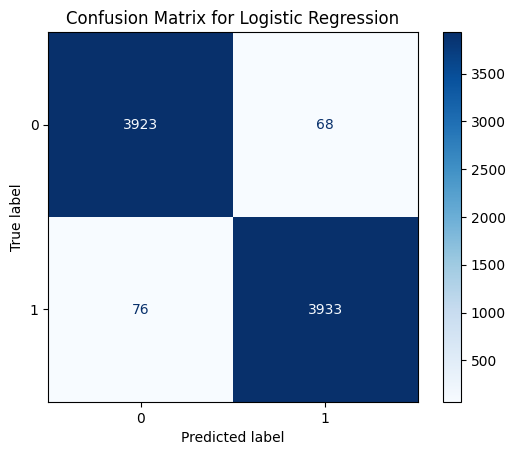

<Figure size 640x480 with 0 Axes>

In [7]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

plt.savefig("cure_confusion_matrix_for_logistic_regression.png", format="png", dpi=300)

In [8]:
print("Intercept:", logistic_model.intercept_)
print("Coefficient(s):", logistic_model.coef_)

Intercept: [-7.95772406]
Coefficient(s): [[-2.40526186e-01 -9.30031613e-02  4.38309292e-02 -5.38507916e-02
  -1.44504161e-01 -9.36048607e-02 -5.14274641e-02  7.20369383e-01
   7.94104505e-01 -3.02005389e+00  3.48376613e-02  1.03714203e-01
  -7.28632992e-02 -1.19547089e-01 -1.97882473e-01 -1.50095447e+01
  -1.93393174e+01 -1.76937987e+00 -6.62730543e+00  2.70123812e-02
  -3.68242541e-04 -1.64693571e-01 -8.44830095e-02 -6.19260237e-02
  -6.89141185e-02 -9.78215270e-02  2.37463611e-02  7.97399098e-02
   2.49352975e+01  1.35357397e-02 -4.98074184e-02  1.59313725e-02
   7.17214787e-03 -1.24741670e-01 -6.19647079e-02 -6.26129632e-02
  -8.95007380e-03 -5.41765918e-02 -8.64306570e-02 -2.68502433e-02
  -1.94711934e+00 -1.98865853e+00 -1.98144778e+00 -2.04049841e+00
  -5.40583219e-01 -4.16422039e-01 -5.15690044e-01 -6.01099101e-01
  -4.60895813e-01 -4.13319941e-01 -4.68702385e-01 -6.41306332e-01
  -3.28175969e-01 -5.26071564e-01 -4.11131466e-01 -5.72954415e-01
  -4.93832078e-01 -5.10702778e-01 -

# **Random Forest**

In [7]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [5, 10, 'sqrt', 'log2'],
    'n_estimators': [50, 100, 200, 400]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


c:\Users\comad\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': [5, 10, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [50, 100, 200, 400]},
             scoring='accuracy', verbose=1)

In [8]:
rf_results = grid_search.cv_results_

In [9]:
print(rf_results)

{'mean_fit_time': array([ 2.56837659,  5.00372353, 10.6423903 , 21.02584262,  2.65619674,
        5.240977  , 10.42257552, 21.60808177,  2.78174438,  5.40990191,
       10.02430148, 20.08447156,  3.96892915,  7.4635488 , 15.10129051,
       29.36317449,  3.75774693,  7.32647715, 14.81930218, 28.6343647 ,
        3.60690055,  7.21392064, 14.57421837, 29.74004784,  3.16164289,
        6.18158865, 12.7785037 , 24.87331238,  3.15383015,  6.28409033,
       12.72432775, 24.78698182,  3.08799901,  6.13718357, 12.15957828,
       25.49827261,  2.92980933,  5.88507705, 11.22928424, 22.83448095,
        2.92081652,  5.6041996 , 10.66239586, 21.56058125,  2.49684567,
        4.92499604, 10.24201031, 20.338732  ,  1.78064113,  3.46854954,
        6.92288604, 13.98042059,  1.74891872,  3.44723377,  7.12527385,
       14.29708223,  1.83671103,  3.53799586,  7.25345383, 13.48674164,
        2.98293281,  6.11502156, 11.97403378, 24.00496931,  2.94811163,
        5.77907987, 12.1627286 , 23.40391231, 

In [10]:
print("Best parameters found: ", grid_search.best_params_)

best_rf_model = grid_search.best_estimator_

Best parameters found:  {'max_depth': None, 'max_features': 10, 'min_samples_leaf': 1, 'n_estimators': 200}


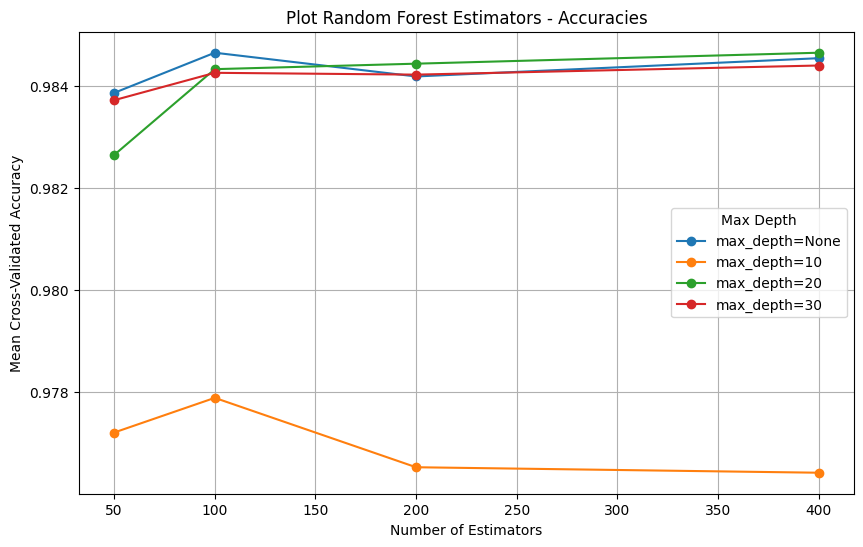

<Figure size 640x480 with 0 Axes>

In [11]:
# Visualize the accuracy for different n_estimators
plt.figure(figsize=(10, 6))
for max_depth in param_grid['max_depth']:
    scores = []
    for n_estimators in param_grid['n_estimators']:
        # Filter results based on both max_depth and n_estimators
        score = [rf_results['mean_test_score'][i] for i in range(len(rf_results['params']))
                 if rf_results['params'][i]['max_depth'] == max_depth and
                    rf_results['params'][i]['n_estimators'] == n_estimators]
        # Append the mean score for each n_estimators value
        scores.append(score[0] if score else None)
    
    plt.plot(param_grid['n_estimators'], scores, marker='o', label=f'max_depth={max_depth}')


plt.title('Plot Random Forest Estimators - Accuracies')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.legend(title='Max Depth')
plt.grid(True)
plt.show()

# Save the plot as an image file
plt.savefig("cure_random_forest_accuracy_plot.png", format="png", dpi=300)  # Adjust format and dpi as needed


In [12]:
start_time = time.time()

best_rf_model.fit(X_train, y_train)

end_time = time.time()

y_pred = best_rf_model.predict(X_test)

In [13]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
train_time = end_time - start_time

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)
print("Training Time: ", train_time)
print("Classification Report:\n", class_report)

Accuracy:  0.9925
Precision:  0.9925
Recall:  0.9925
F1 Score:  0.9925
Training Time:  13.215606212615967
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3991
           1       0.99      0.99      0.99      4009

    accuracy                           0.99      8000
   macro avg       0.99      0.99      0.99      8000
weighted avg       0.99      0.99      0.99      8000



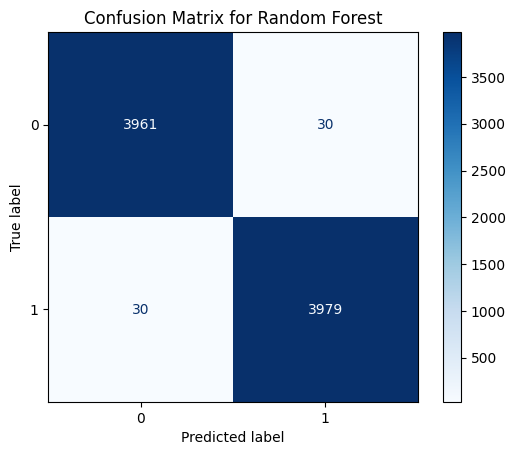

<Figure size 640x480 with 0 Axes>

In [14]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Random Forest")
plt.show()

plt.savefig("cure_confusion_matrix_for_rf.png", format="png", dpi=300)

# **XGBoosst**

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(booster='gbtree', eval_metric='mlogloss', random_state=42)

param_grid = {
    'max_depth': [3, 4, 5, 7],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'min_child_weight': [1, 3, 5],
    'learning_rate': [ 0.001, 0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200, 400]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


c:\Users\comad\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:23:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5, 7],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 200, 400],
                         'subsample': [0.7, 0.8, 0.9, 1.0]},
             scoring='accuracy', verbose=1)

In [18]:
xg_results = grid_search.cv_results_

In [19]:
print("Best parameters found: ", grid_search.best_params_)
best_xgb_model = grid_search.best_estimator_

Best parameters found:  {'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.7}


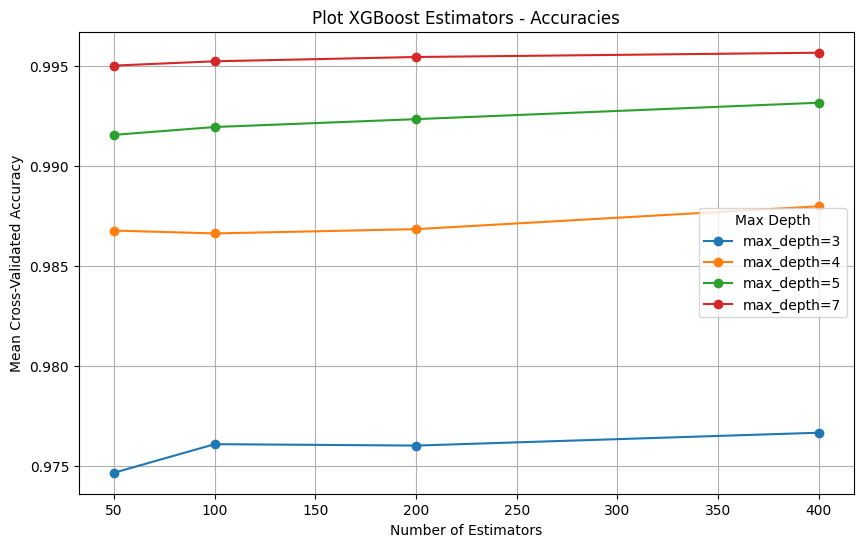

<Figure size 640x480 with 0 Axes>

In [20]:
# Visualize the accuracy for different n_estimators
plt.figure(figsize=(10, 6))
for max_depth in param_grid['max_depth']:
    scores = []
    for n_estimators in param_grid['n_estimators']:
        # Filter results based on both max_depth and n_estimators
        score = [xg_results['mean_test_score'][i] for i in range(len(xg_results['params']))
                 if xg_results['params'][i]['max_depth'] == max_depth and
                    xg_results['params'][i]['n_estimators'] == n_estimators]
        # Append the mean score for each n_estimators value
        scores.append(score[0] if score else None)
    
    plt.plot(param_grid['n_estimators'], scores, marker='o', label=f'max_depth={max_depth}')

plt.title('Plot XGBoost Estimators - Accuracies')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.legend(title='Max Depth')
plt.grid(True)
plt.show()

plt.savefig("cure_xgboost_accuracy_plot.png", format="png", dpi=300)  

In [ ]:
start_time = time.time

best_xgb_model.fit(X_train, y_train)

end_time = time.time

y_pred = best_xgb_model.predict(X_test)

c:\Users\comad\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:23:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
train_time_xg = end_time - start_time
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)
print("Classification Report:\n", class_report)

Accuracy:  0.99725
Precision:  0.99725
Recall:  0.99725
F1 Score:  0.99725
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3991
           1       1.00      1.00      1.00      4009

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



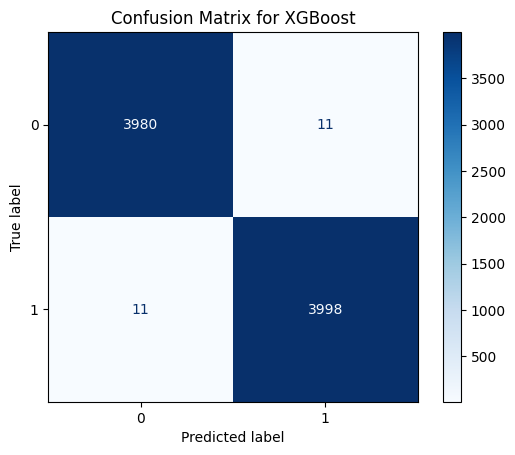

<Figure size 640x480 with 0 Axes>

In [23]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for XGBoost")
plt.show()

plt.savefig("cure_confusion_matrix_for_xgboost.png", format="png", dpi=300)

# **Neural Network**

In [24]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy

In [25]:
# Define the model
model = Sequential()

# Input layer
model.add(Dense(64, input_dim = X_train.shape[1], activation='relu'))

# Hidden layers
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.003),
              loss=BinaryCrossentropy(),
              metrics=[BinaryAccuracy()])

# Train the model
history = model.fit(X_train, y_train, 
                    validation_data=(X_valid, y_valid),
                    epochs=70, 
                    batch_size=64)

Epoch 1/70


c:\Users\comad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - binary_accuracy: 0.8571 - loss: 0.3122 - val_binary_accuracy: 0.9515 - val_loss: 0.1134
Epoch 2/70
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.9627 - loss: 0.0886 - val_binary_accuracy: 0.9567 - val_loss: 0.0891
Epoch 3/70
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.9722 - loss: 0.0669 - val_binary_accuracy: 0.9737 - val_loss: 0.0605
Epoch 4/70
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.9732 - loss: 0.0659 - val_binary_accuracy: 0.9808 - val_loss: 0.0537
Epoch 5/70
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.9758 - loss: 0.0570 - val_binary_accuracy: 0.9762 - val_loss: 0.0541
Epoch 6/70
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.9747 - loss: 0.0589 - val_binary_accuracy: 0.9830 - val_loss: 0.0435
Epoch 7/70
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.9793 - loss: 0.0475 - val_binary_accuracy: 0.9810 - val_loss: 0.0422
Epoch 8/70
438/43

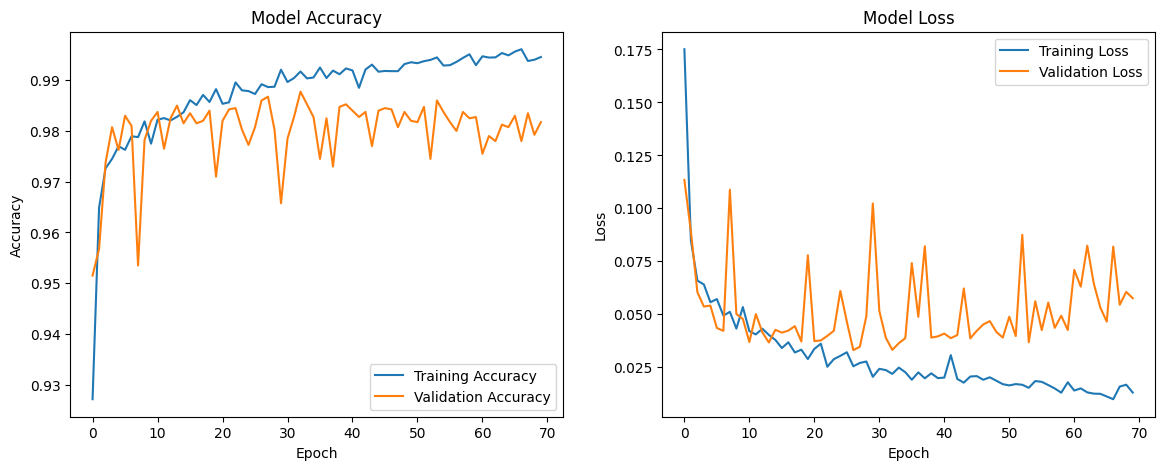

<Figure size 640x480 with 0 Axes>

In [26]:
# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['binary_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_binary_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.savefig("cure_NN_training_accuracy_and_loss.png", format="png", dpi=300)  

In [27]:
y_pred = np.round(model.predict(X_test))

#y_pred = model.predict(X_test)

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step


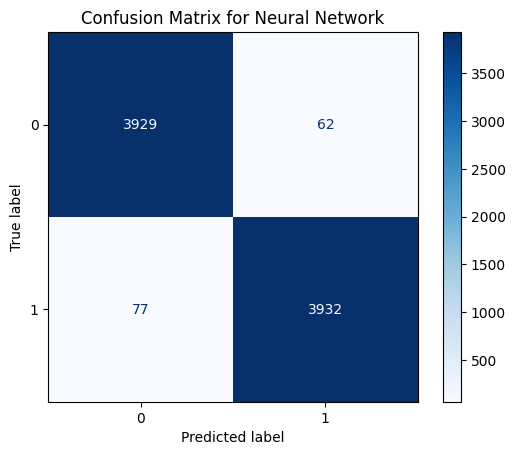

<Figure size 640x480 with 0 Axes>

In [28]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Neural Network")
plt.show()

plt.savefig("cure_confusion_matrix_nn.png", format="png", dpi=300)  

In [29]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - binary_accuracy: 0.9827 - loss: 0.0534
Test Loss: 0.054377660155296326
Test Accuracy: 0.9826250076293945


# Bayesian Optimization

|   iter    |  target   |  dropout  | learni... |  neurons  |
-------------------------------------------------------------
| 1         | 0.9843    | 0.2498    | 0.009512  | 97.98     |


c:\Users\comad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 2         | 0.9872    | 0.3395    | 0.001645  | 33.47     |


c:\Users\comad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 3         | 0.9844    | 0.1232    | 0.008675  | 83.32     |


c:\Users\comad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 4         | 0.987     | 0.3832    | 0.0003038 | 124.6     |


c:\Users\comad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 5         | 0.9852    | 0.433     | 0.002202  | 36.36     |


c:\Users\comad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 6         | 0.9839    | 0.1734    | 0.003112  | 74.77     |


c:\Users\comad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 7         | 0.9852    | 0.2728    | 0.002983  | 84.53     |


c:\Users\comad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 8         | 0.9859    | 0.1558    | 0.002992  | 57.03     |


c:\Users\comad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 9         | 0.9837    | 0.2824    | 0.007873  | 38.36     |


c:\Users\comad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 10        | 0.9889    | 0.3057    | 0.005965  | 21.2      |


c:\Users\comad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 11        | 0.9822    | 0.2225    | 0.008395  | 24.1      |


c:\Users\comad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 12        | 0.9879    | 0.3686    | 0.003261  | 20.63     |


c:\Users\comad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 13        | 0.9845    | 0.4715    | 0.009018  | 21.89     |


c:\Users\comad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 14        | 0.986     | 0.1134    | 0.006938  | 21.01     |


c:\Users\comad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 15        | 0.9815    | 0.388     | 0.009833  | 21.07     |


c:\Users\comad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 16        | 0.9837    | 0.2329    | 0.006831  | 123.9     |


c:\Users\comad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 17        | 0.984     | 0.1378    | 0.008033  | 82.72     |


c:\Users\comad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 18        | 0.9876    | 0.2612    | 0.008423  | 100.8     |


c:\Users\comad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 19        | 0.9841    | 0.3441    | 0.002292  | 125.3     |


c:\Users\comad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 20        | 0.9855    | 0.1163    | 0.00494   | 82.27     |


c:\Users\comad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 21        | 0.989     | 0.2233    | 0.008625  | 26.51     |


c:\Users\comad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 22        | 0.9876    | 0.4322    | 0.006429  | 67.26     |


c:\Users\comad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 23        | 0.9846    | 0.2073    | 0.002627  | 72.5      |


c:\Users\comad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 24        | 0.985     | 0.3449    | 0.000709  | 63.59     |


c:\Users\comad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 25        | 0.9861    | 0.3369    | 0.007224  | 30.33     |


c:\Users\comad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 26        | 0.9856    | 0.4783    | 0.004569  | 118.0     |


c:\Users\comad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 27        | 0.9884    | 0.3722    | 0.003603  | 32.14     |


c:\Users\comad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 28        | 0.9859    | 0.2345    | 0.0006755 | 114.4     |


c:\Users\comad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 29        | 0.9829    | 0.4521    | 0.008393  | 51.93     |


c:\Users\comad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 30        | 0.9885    | 0.2316    | 0.009634  | 72.59     |
Βέλτιστες Υπερπαράμετροι: {'dropout': 0.22331369534696438, 'learning_rate': 0.008624729451091053, 'neurons': 26.510082990115897}
Epoch 1/50


c:\Users\comad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8346 - loss: 0.3284 - val_accuracy: 0.9539 - val_loss: 0.1101
Epoch 2/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9567 - loss: 0.1047 - val_accuracy: 0.9177 - val_loss: 0.1780
Epoch 3/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9535 - loss: 0.1086 - val_accuracy: 0.9546 - val_loss: 0.0958
Epoch 4/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9620 - loss: 0.0899 - val_accuracy: 0.9795 - val_loss: 0.0492
Epoch 5/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9682 - loss: 0.0754 - val_accuracy: 0.9734 - val_loss: 0.0614
Epoch 6/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9680 - loss: 0.0719 - val_accuracy: 0.9770 - val_loss: 0.0489
Epoch 7/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9691 - loss: 0.0739 - val_accuracy: 0.9754 - val_loss: 0.0554
Epoch 8/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9697 - loss: 0.0716 - val_accuracy: 0.9789 - val_

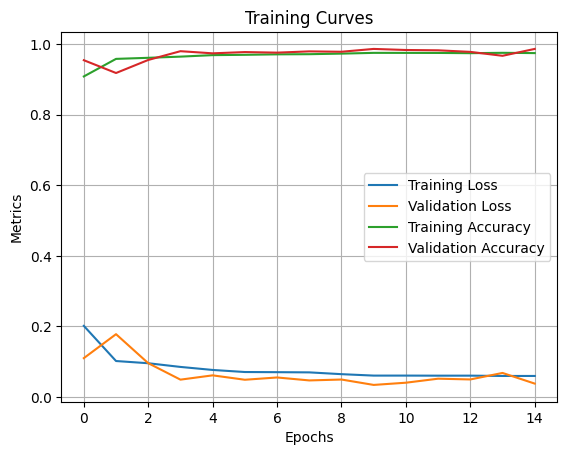

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step
Accuracy: 0.985
Precision: 0.983
Recall: 0.987
F1 Score: 0.985
Confusion Matrix:
 [[3923   68]
 [  53 3956]]


In [ ]:
# Απαραίτητες βιβλιοθήκες
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from bayes_opt import BayesianOptimization
import matplotlib.pyplot as plt


# Συνάρτηση αξιολόγησης για Bayesian Optimization
def nn_evaluate(learning_rate, neurons, dropout):
    neurons = int(neurons)

    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(dropout))
    model.add(Dense(neurons // 2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                        validation_split=0.2, verbose=0,
                        callbacks=[EarlyStopping(patience=5, restore_best_weights=True)])

    score = model.evaluate(X_test, y_test, verbose=0)
    return score[1]

# Bayesian Optimization των υπερπαραμέτρων
pbounds = {'learning_rate': (1e-4, 1e-2), 'neurons': (16, 128), 'dropout': (0.1, 0.5)}

optimizer = BayesianOptimization(f=nn_evaluate, pbounds=pbounds, random_state=42)
optimizer.maximize(init_points=10, n_iter=20)

# Βέλτιστες Υπερπαράμετροι
best_params = optimizer.max['params']
print("Βέλτιστες Υπερπαράμετροι:", best_params)

# Κατασκευή του τελικού μοντέλου
neurons_optimal = int(best_params['neurons'])
model = Sequential()
model.add(Dense(neurons_optimal, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(best_params['dropout']))
model.add(Dense(neurons_optimal // 2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=best_params['learning_rate']),
              loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_split=0.2, verbose=1,
                    callbacks=[EarlyStopping(patience=5, restore_best_weights=True)])

# Εμφάνιση καμπύλων εκπαίδευσης
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.title('Training Curves')
plt.grid(True)
plt.show()

# Υπολογισμός προβλέψεων και μετρικών επίδοσης
y_pred = (model.predict(X_test) > 0.5).astype("int32")

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Εκτύπωση των μετρικών επίδοσης
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print("Confusion Matrix:\n", conf_matrix)
